#1f77b4
(0.08509803921568627, 0.32666666666666666, 0.49411764705882355)
#ff7f0e
(0.7, 0.34862745098039216, 0.038431372549019606)
#2ca02c
(0.12078431372549019, 0.43921568627450974, 0.12078431372549019)
#d62728
(0.5874509803921568, 0.10705882352941176, 0.10980392156862744)
#1f77b4
(0.08509803921568627, 0.32666666666666666, 0.49411764705882355)
#ff7f0e
(0.7, 0.34862745098039216, 0.038431372549019606)
#2ca02c
(0.12078431372549019, 0.43921568627450974, 0.12078431372549019)
#d62728
(0.5874509803921568, 0.10705882352941176, 0.10980392156862744)


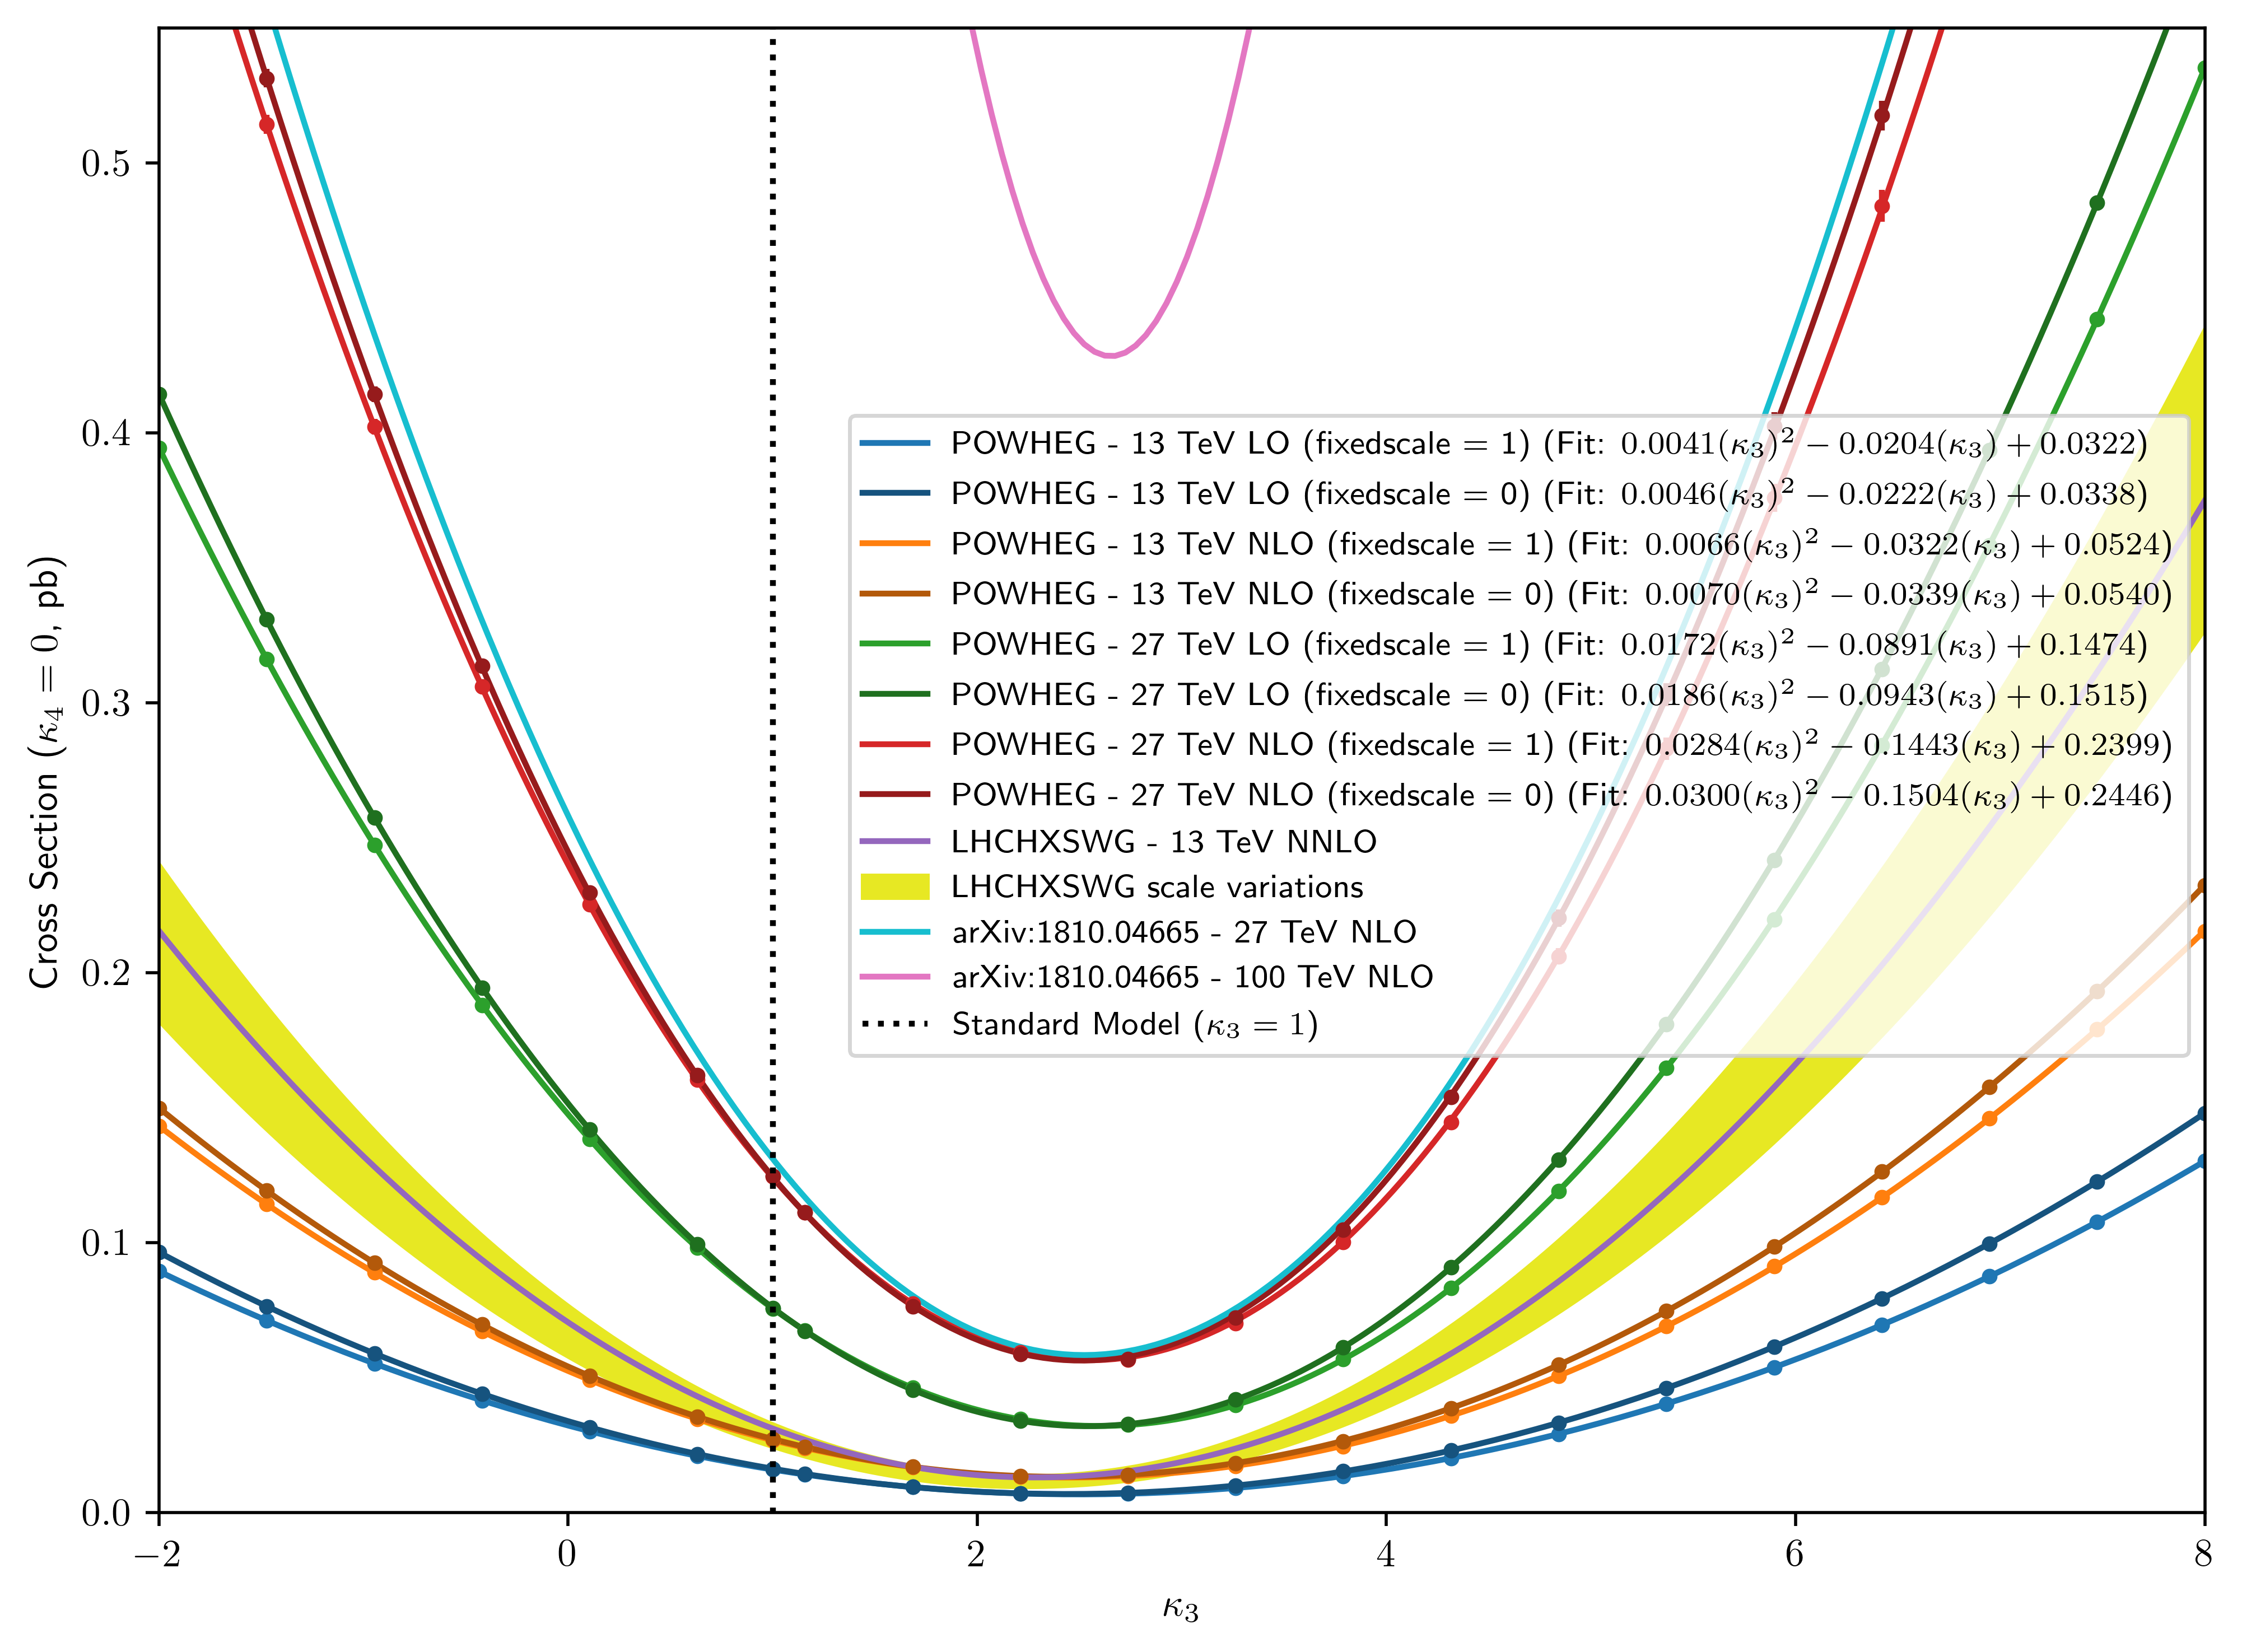

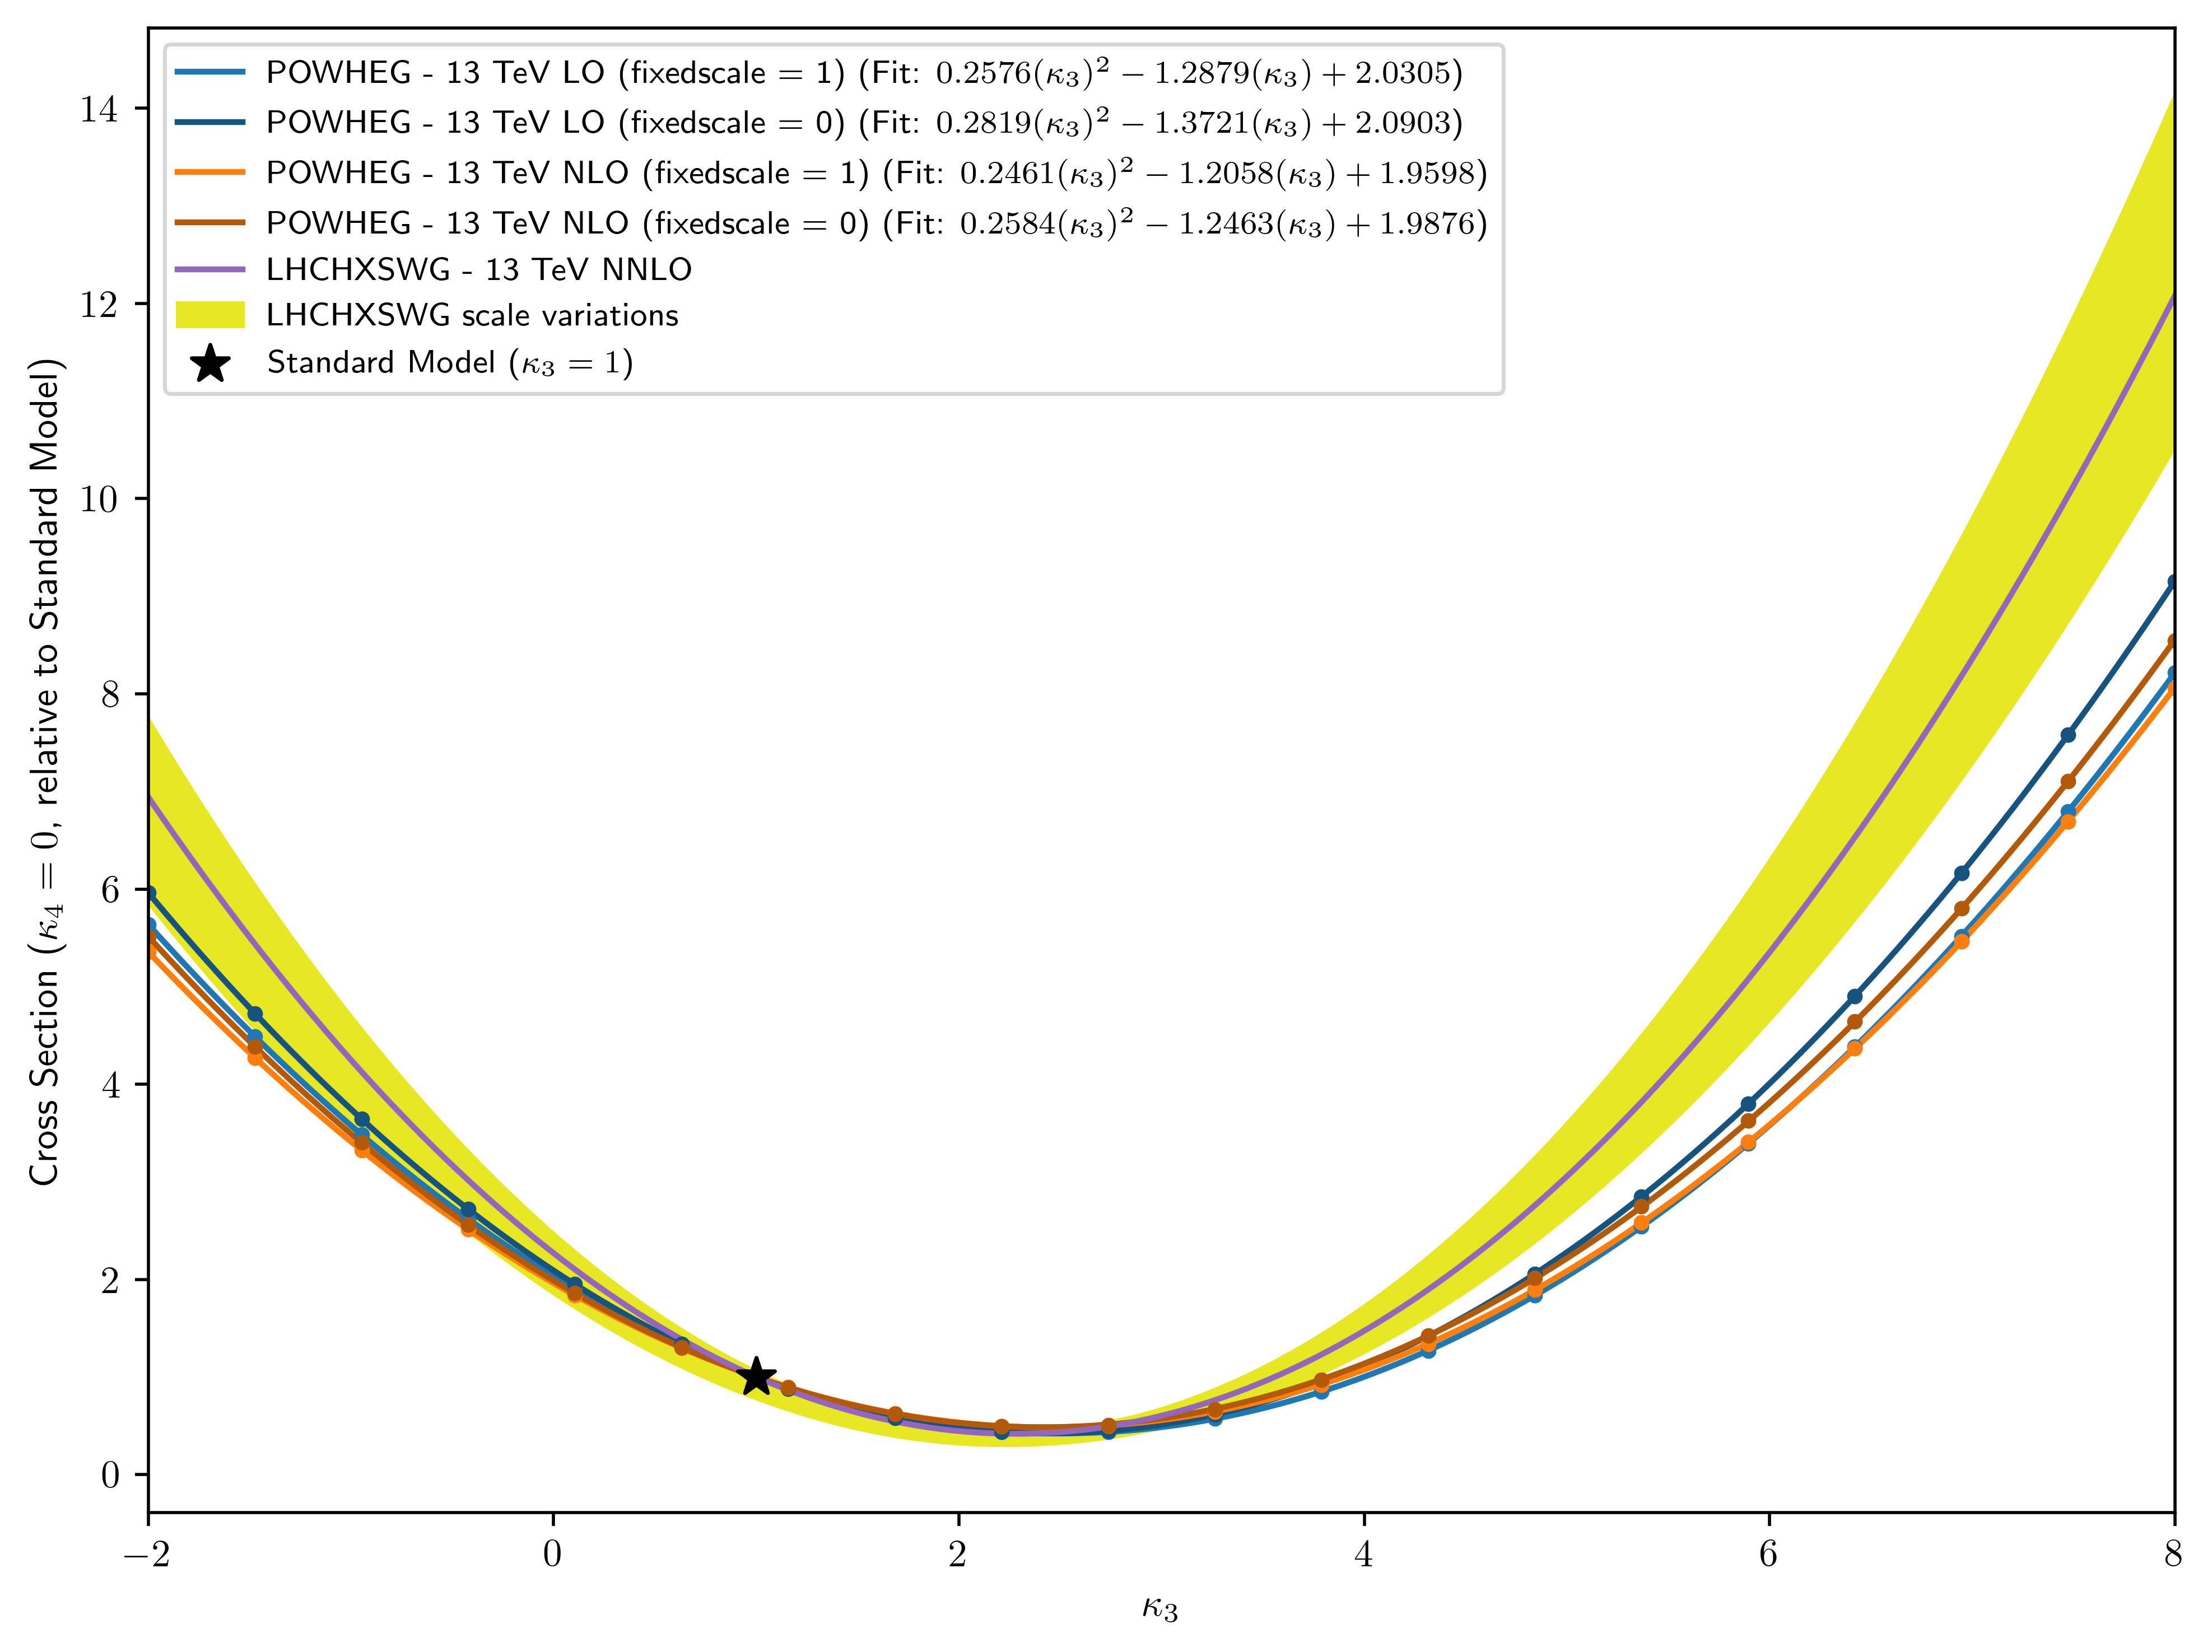

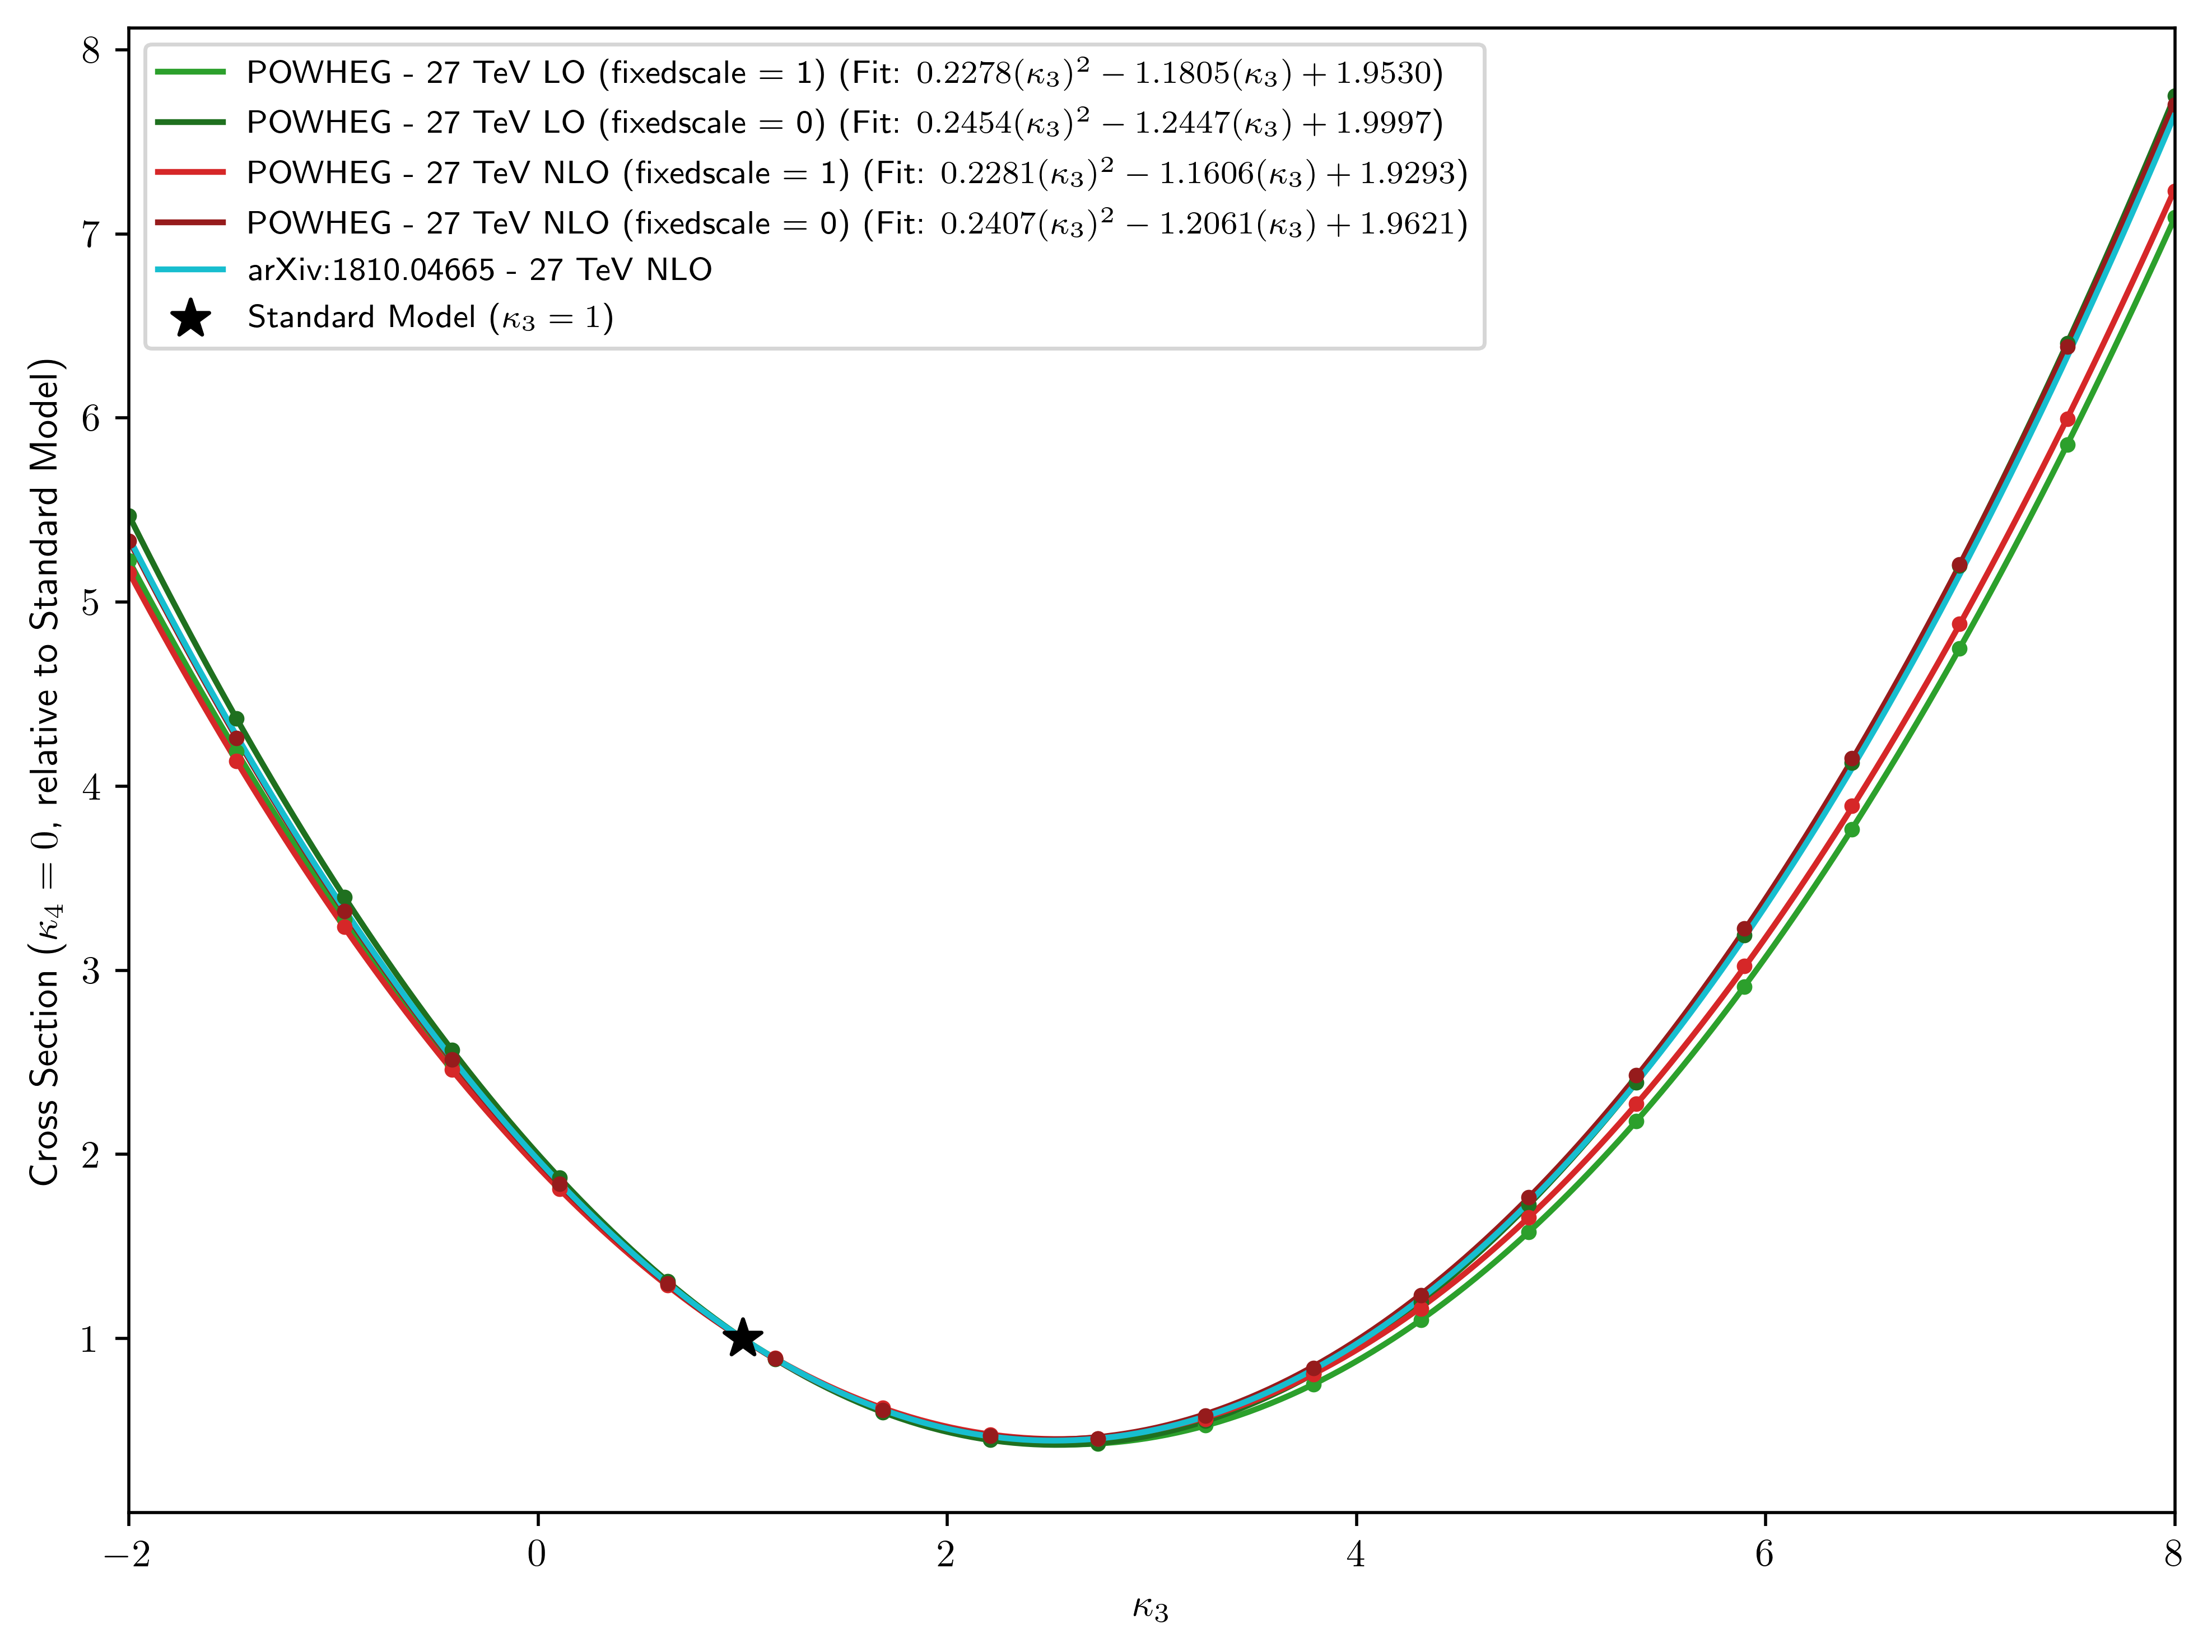

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import matplotlib.colors as mcolors

plt.rcParams['text.usetex'] = True

fit_kappa3 = np.linspace(-2, 8, 200)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#e7e823' , '#17becf']

#colors = ['indianred', 'orange', 'gold', 'chartreuse', 'turquoise', 'deepskyblue', 'plum', 'pink', 'peachpuff' , 'burlywood']

#colors = ['red', 'orange', 'green', 'lightblue', 'darkblue', 'purple', 'pink', 'brown', 'yellow', 'grey']

    
def csv_from_powheg(file_path, normalized, title, color = '#000000'):
    kappa3_A = []
    cross_section_A = []
    uncertainty_A = []
    
    with open(file_path, 'r') as csvfile:
        csv_reader = csv.reader(csvfile)
        next(csv_reader)    # Skip header
        for row in csv_reader:
            kappa3_A.append(float(row[0]))
            cross_section_A.append(float(row[1]))
            uncertainty_A.append(float(row[2]))

    kappa3 = np.array(kappa3_A)
    cross_section = np.array(cross_section_A)
    uncertainty = np.array(uncertainty_A)
    one_index = np.where(kappa3 == 1)[0][0]
    if normalized:
        cross_section = cross_section / cross_section[one_index]
        uncertainty = uncertainty / cross_section[one_index]

    coeffs = np.polyfit(kappa3, cross_section, 2)
    fit_cross_section = np.polyval(coeffs, fit_kappa3)
    equation = f'Fit: ${coeffs[0]:.4f}(\kappa_3)^2 {sign(coeffs[1])} {coeffs[1]:.4f}(\kappa_3) {sign(coeffs[2])} {coeffs[2]:.4f}$'    

    #if color == '#000000':
    #    color = plt.gca()._get_lines.get_next_color()
    #    color = mcolors.to_rgb(color)
    #    color = tuple(1-(1-c)/2 for c in color)
    #else:
    #    color = mcolors.to_rgb(color)
    #    color = tuple(c * 0.7 for c in color)
    
    plt.errorbar(kappa3, cross_section, yerr=uncertainty, fmt='o', markersize=3, color=color)
    plt.plot(fit_kappa3, fit_cross_section, label=f'{title} ({equation})', color=color)
    
    print((color))
    
    return color
    

def sign(num):
    if float(num) >= 0:
        return '+'
    else:
        return ''

def arxiv1810_27(k):
    #return 0.44 * (1-0.79 * k + 0.81 * k**2) * 0.001
    return 131 * (1-0.73*(k-1) + 0.24 * (k-1)**2) * 0.001

def arxiv1810_100(k):
    #return 5.1 * (1 - 0.67 * k + 0.72 * k**2) * 0.001
    return 1151 * (1-0.76 * (k-1) + 0.23 * (k-1)**2) * 0.001

def LHCHXSWG(k):
    return 1/1000 * (70.3874 - 50.4111*k + 11.0595*k**2)

def LHCHXSWG_upper(k):
    def a(k):
        return 0.001 * (76.6075 - 56.4818*k + 12.635*k**2)
    def b(k):
        return 0.001 * (75.4617 - 56.3164*k + 12.7135*k**2)

    if a(k) > b(k):
        return a(k)
    else:
        return b(k)

def LHCHXSWG_lower(k):
    def a(k):
        return 0.001 * (57.6809 - 42.9905*k + 9.58474*k**2)
    def b(k):
        return 0.001 * (58.3769 - 43.9657*k + 9.87094*k**2)

    if a(k) < b(k):
        return a(k)
    else:
        return b(k)

def traverse_lower(k):
    arr = []
    for x in k:
        arr.append(LHCHXSWG_lower(x))
    return np.array(arr)

def traverse_upper(k):
    arr = []
    for x in k:
        arr.append(LHCHXSWG_upper(x))
    return np.array(arr)

def graph(normalized, which = 0):

    def _13tevplots():
        color = csv_from_powheg('/Users/zachgillis/Downloads/13TeV_LO_fixedscale1/results.csv', normalized, 'POWHEG - 13 TeV LO (fixedscale = 1)', colors[0])
        csv_from_powheg('/Users/zachgillis/Downloads/13TeV_LO_fixedscale0/results.csv', normalized, 'POWHEG - 13 TeV LO (fixedscale = 0)', tuple(c * 0.7 for c in mcolors.to_rgb(color)))

        color = csv_from_powheg('/Users/zachgillis/Downloads/13TeV_NLO_fixedscale1/results.csv', normalized, 'POWHEG - 13 TeV NLO (fixedscale = 1)', colors[1])
        csv_from_powheg('/Users/zachgillis/Downloads/13TeV_NLO_fixedscale0/results.csv', normalized, 'POWHEG - 13 TeV NLO (fixedscale = 0)', tuple(c * 0.7 for c in mcolors.to_rgb(color)))
    
    def _27tevplots():
        color = csv_from_powheg('/Users/zachgillis/Downloads/27TeV_LO_fixedscale1/results.csv', normalized, 'POWHEG - 27 TeV LO (fixedscale = 1)', colors[2])
        csv_from_powheg('/Users/zachgillis/Downloads/27TeV_LO_fixedscale0/results.csv', normalized, 'POWHEG - 27 TeV LO (fixedscale = 0)', tuple(c * 0.7 for c in mcolors.to_rgb(color)))

        color = csv_from_powheg('/Users/zachgillis/Downloads/27TeV_NLO_fixedscale1/results.csv', normalized, 'POWHEG - 27 TeV NLO (fixedscale = 1)', colors[3])
        csv_from_powheg('/Users/zachgillis/Downloads/27TeV_NLO_fixedscale0/results.csv', normalized, 'POWHEG - 27 TeV NLO (fixedscale = 0)', tuple(c * 0.7 for c in mcolors.to_rgb(color)))

    if which == 0:
        _13tevplots()
        _27tevplots()
    elif which == 13:
        _13tevplots()
    elif which == 27:
        _27tevplots()
    
    
    plt.xlabel(r'$\kappa_3$')

    if normalized:
        plt.ylabel(r'Cross Section ($\kappa_4=0$, relative to Standard Model)')
        arxiv1810_27_np = arxiv1810_27(fit_kappa3) / arxiv1810_27(np.array([1]))
        arxiv1810_100_np = arxiv1810_100(fit_kappa3) / arxiv1810_100(np.array([1]))
        LHCHXSWG_np = LHCHXSWG(fit_kappa3) / LHCHXSWG(np.array([1]))
        upper_np = traverse_upper(fit_kappa3) / LHCHXSWG(np.array([1]))
        lower_np = traverse_lower(fit_kappa3) / LHCHXSWG(np.array([1]))

    elif not normalized:
        plt.ylabel(r'Cross Section ($\kappa_4=0$, pb)')
        arxiv1810_27_np = arxiv1810_27(fit_kappa3)
        arxiv1810_100_np = arxiv1810_100(fit_kappa3)
        LHCHXSWG_np = LHCHXSWG(fit_kappa3)
        upper_np = traverse_upper(fit_kappa3)
        lower_np = traverse_lower(fit_kappa3)

    if which == 13 or which == 0:
        plt.plot(fit_kappa3, LHCHXSWG_np, label = 'LHCHXSWG - 13 TeV NNLO', color = colors[4])
        plt.fill_between(fit_kappa3, upper_np, lower_np, label = 'LHCHXSWG scale variations', color = colors[8])
    if which == 27 or which == 0:
        plt.plot(fit_kappa3, arxiv1810_27_np, label = 'arXiv:1810.04665 - 27 TeV NLO', color = colors[9])
    if not normalized:
        plt.plot(fit_kappa3, arxiv1810_100_np, label = 'arXiv:1810.04665 - 100 TeV NLO', color = colors[6])

    

    #plt.grid(True)
    plt.xlim(-2,8)
    plt.tight_layout()


plt.figure(1, figsize=(8, 6), dpi=500)
graph(False)
#plt.yscale("log")

plt.ylim(0, 0.55)
plt.plot(np.linspace(1,1,200), np.linspace(-1,1,200), color='black', linestyle='dotted', zorder=100, label = 'Standard Model ($\kappa_3=1$)')
plt.legend(loc='upper right', bbox_to_anchor = (1, 0.75), fontsize='small')
plt.savefig('graph_absolute.png', dpi=500)

plt.figure(2, figsize=(8,6), dpi=500)
graph(True, 13)

plt.scatter(1, 1, marker='*', label = 'Standard Model ($\kappa_3=1$)', color='black', s=100, zorder=100)
plt.legend(fontsize='small')
plt.savefig('graph_relative_13tev.png', dpi=500)

plt.figure(3, figsize=(8,6), dpi=500)
graph(True, 27)

plt.scatter(1, 1, marker='*', label = 'Standard Model ($\kappa_3=1$)', color='black', s=100, zorder=100)
plt.legend(fontsize='small')
plt.savefig('graph_relative_13tev.png', dpi=500)


plt.show()
